In [29]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import style

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [30]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [31]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [32]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
june_temps = []
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [33]:
#  3. Convert the June temperatures to a list.
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [34]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temps, columns=['date', 'June Temperature'])

In [35]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,June Temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [36]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [37]:
# 7. Convert the December temperatures to a list.
december_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [38]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(december_temps, columns=['date', 'Dec Temperature'])

In [39]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,Dec Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Additional Queries and Data Visualizations

(0.0, 400.0)

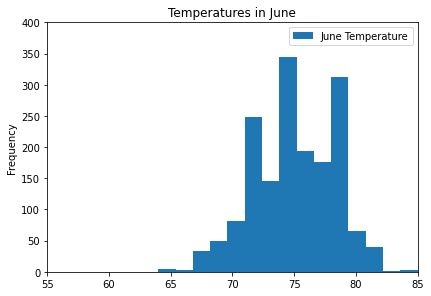

In [51]:
# Graphing June Temperatures
june_temp_plot = pd.DataFrame(june_temp_df, columns=['tobs'])
june_temp_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('Temperatures in June')
plt.xlim([55,85])
plt.ylim([0,400])


(0.0, 400.0)

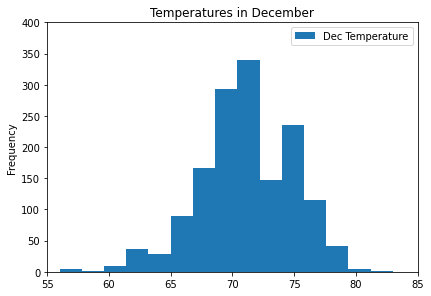

In [52]:
# Graphing December Temperatures
dec_temp_plot= pd.DataFrame(dec_temps_df, columns=['tobs'])
dec_temps_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('Temperatures in December')
plt.xlim([55,85])
plt.ylim([0,400])

In [56]:
# Additional Query: June Precipitation
june_precipitation = session.query(Measurement.tobs,Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
june_precipitation_df = pd.DataFrame(june_precipitation, columns = ['Temperature', 'Precipitation'])
june_precipitation_df.describe()

,Temperature,Precipitation
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


In [59]:
# Additional Query: December Precipitation
december_precipitation = session.query(Measurement.tobs,Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
dec_precip_df = pd.DataFrame(december_precipitation, columns = ['Temperature', 'Precipitation'])
dec_precip_df.describe()

,Temperature,Precipitation
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000
